<a href="https://colab.research.google.com/github/jacquelinepalumbo/Data-Engineering/blob/main/supply_chain_data_engineer_mvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Engenharia de Dados - Banco de Dados**


 Neste notebook será construído um pipeline de dados utilizando tecnologias na nuvem. O pipeline irá envolver a busca, coleta, modelagem, carga e análise dos dados.

# DEFININDO O PROBLEMA

Na plataforma Kaggle  está um conjunto de dados que foi coletado de uma startup de Moda e Beleza. O conjunto de dados é baseado na cadeia de suprimentos de produtos de maquiagem. Abaixo estão todos os recursos no conjunto de dados:


*   Tipo de produto
*   SKU
*   Preço
*   Disponibilidade
*   Número de produtos vendidos
*   Receita gerada
*   Dados demográficos dos clientes
*   Níveis de estoque
*   Prazos de entrega
*   Quantidades de encomenda
*   Prazos de envio
*   Transportadoras marítimas
*   Custos de envio
*   Nome do fornecedor
*   Localização
*   Tempo de espera
*   Volumes de produção
*   Lead time de fabricação
*   Custos de fabricação
*   Resultados da inspeção
*   Taxas de defeitos
*   Modos de transporte
*   Rotas
*   Custos


# **QUESTIONAMENTOS:**


1.  Quais os itens mais e menos vendidos?
2.  Qual a receita gerada pelo produto mais vendido?
3.  Qual a receita total gerada?
4.  Quais as regiões que os fornecedores estão localizados?


# MODELO ENTIDADE-RELACIONAMENTO

O Modelo Entidade-Relacionamento (MER) é representado através de diagramas chamados Diagramas Entidade-Relacionamento (DER)

Serve como arcabouço para definir adequadamente esquemas conceituais do nosso banco de dados, que será modelado posteriormente em nuvem.

Buscamos modelar uma aplicação em que registramos nossa entidade supply-chain, onde podemos determinar todos os componentes que fazem parte da nossa cadeia de suprimentos da startup.

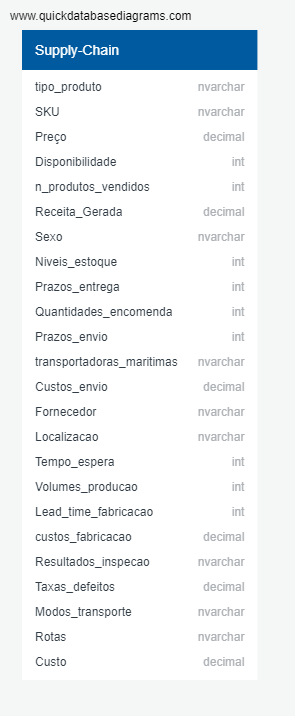

# COLETA DE DADOS

Os dados foram baixados para a máquina local e inseridos manualmente em um container de armazenamento da Microsoft Azure, um banco de dados relacional.
O arquivo denominado supply_chain_data está em formato csv.

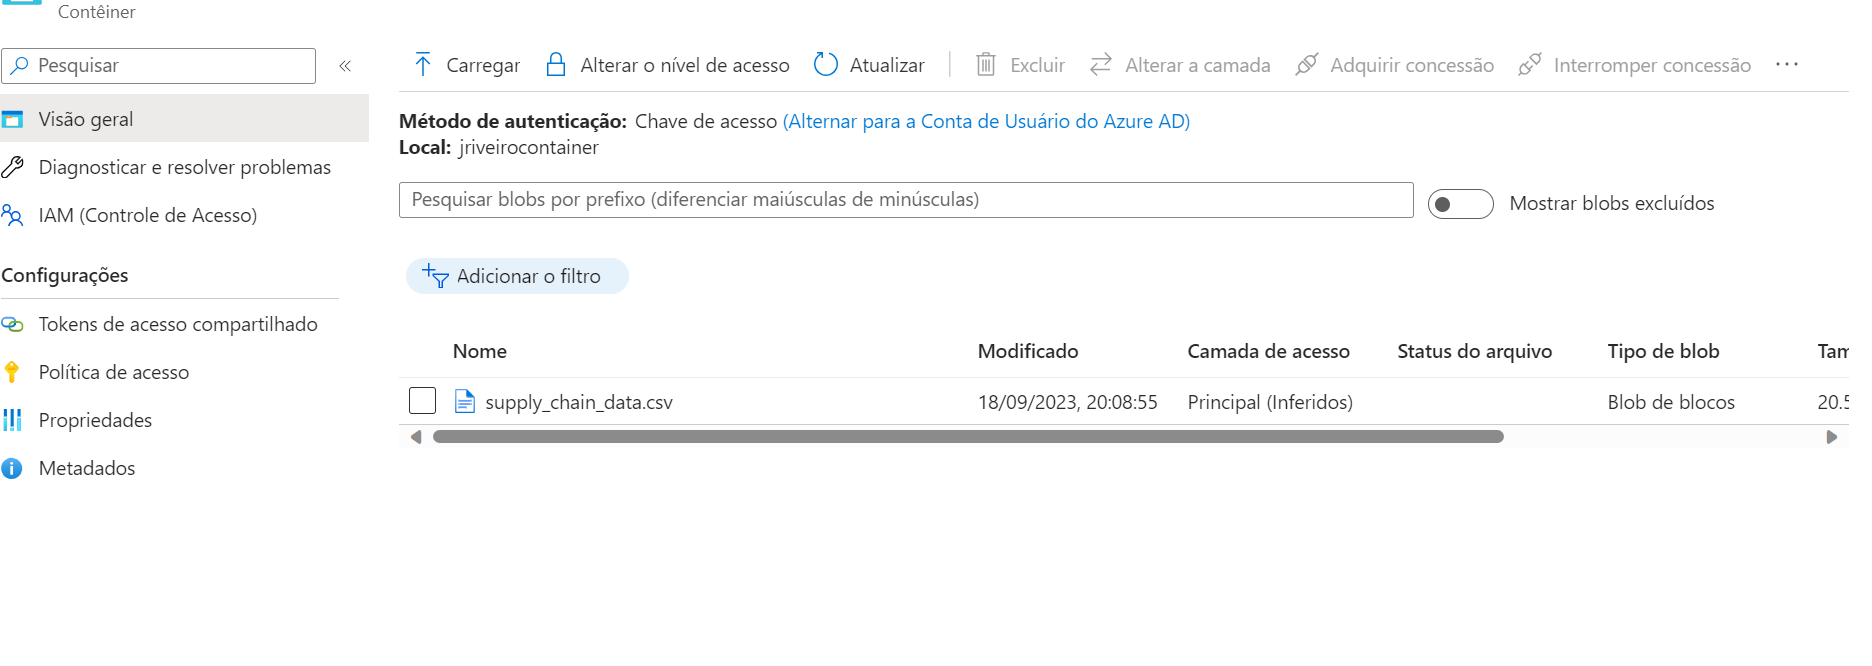

# TRATAMENTO DE DADOS - MODELAGEM COM O DATA FACTORY

O Data Factory fornece uma camada de transformação e integração de dados que constrói o processos ETL (extrair/transformar/carregar) facilmente, sem código, dentro do ambiente.
Em seguida, os dados serão integrados ao Data Studio para realizar as consultas.


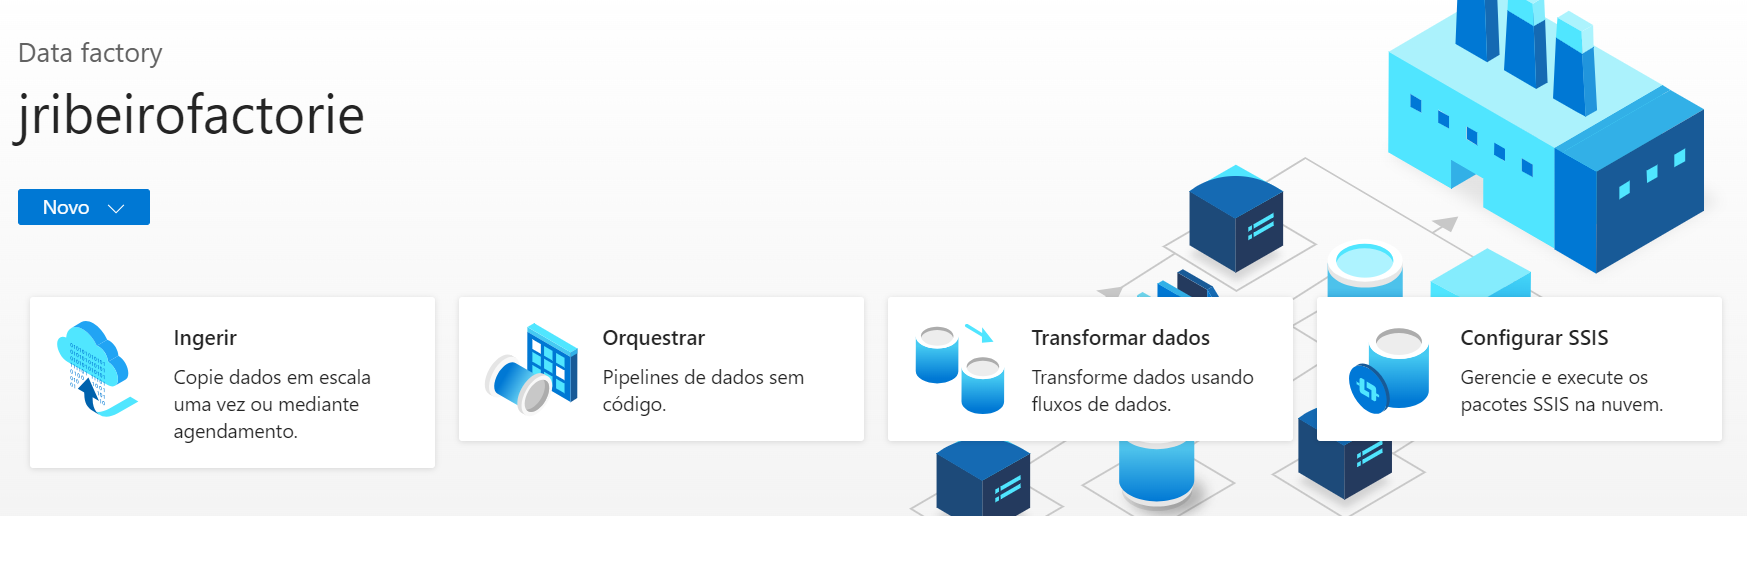

Transformação dos dados:

1. Criar um Pipeline








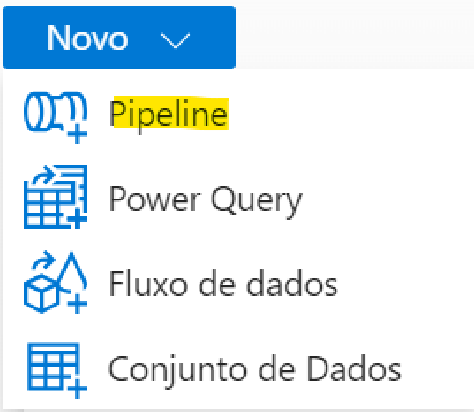

2. Criar um dataset, carregando o nosso arquvio e sendo possível visualizar o esquema.

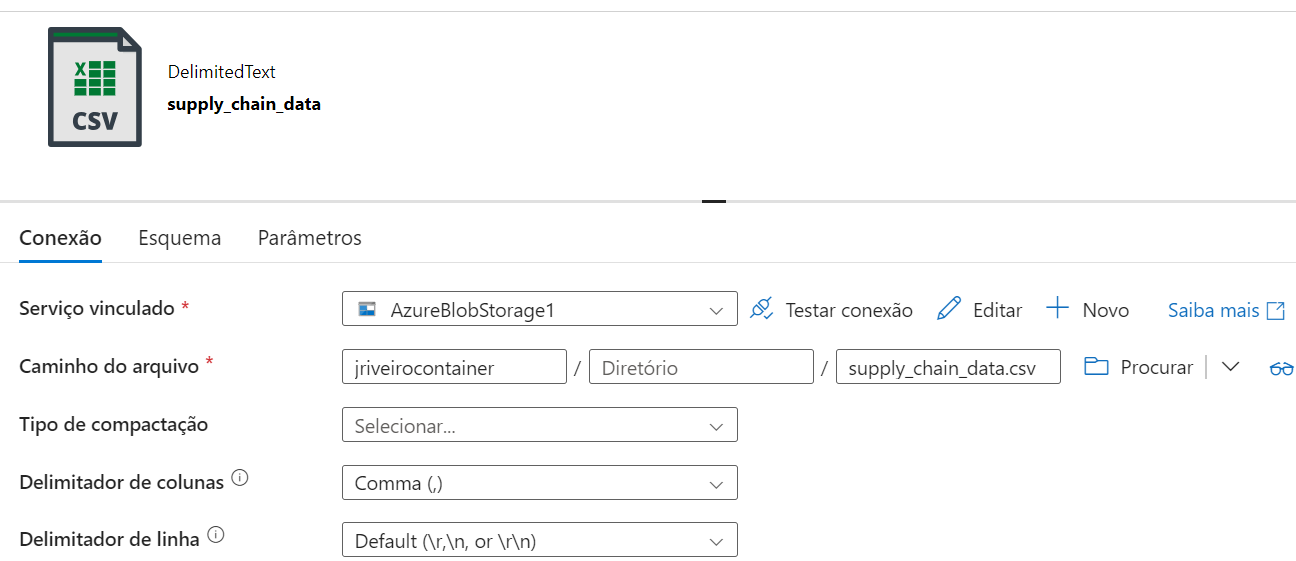

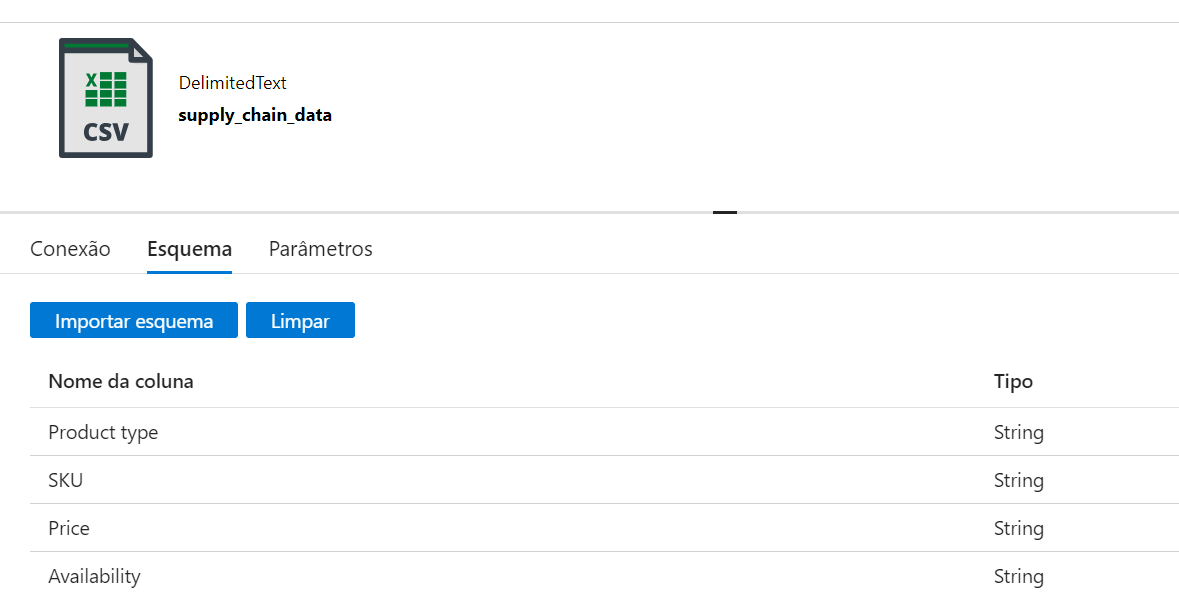

3. Criando um dataflow:
Um fluxo de dados é uma coleção de tabelas criadas e gerenciadas em ambientes do serviço, neste caso, temos apenas um dataset. É possível editar tabelas em seu fluxo de dados, bem como gerenciar agendamentos de atualização de dados diretamente do ambiente em que o fluxo de dados foi criado.


*   Fluxo de saída: nosso dataset:




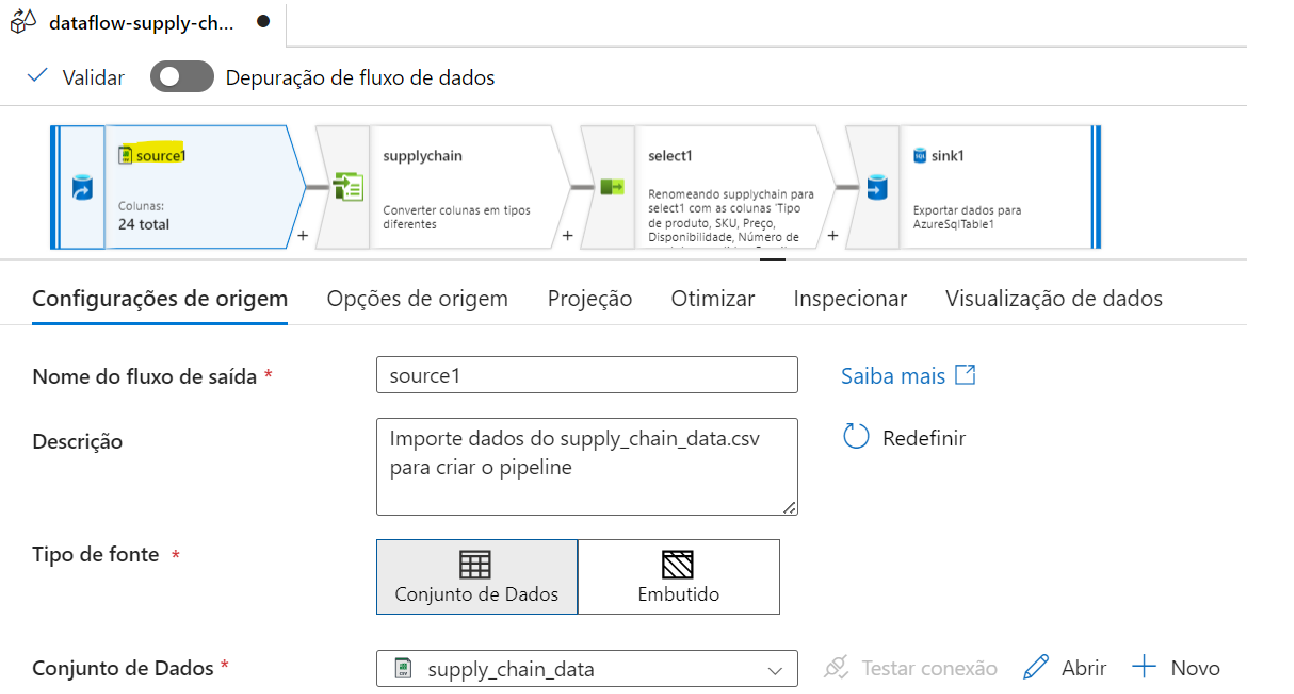



*   Realizado a conversão dos dados (modificando dataypes).




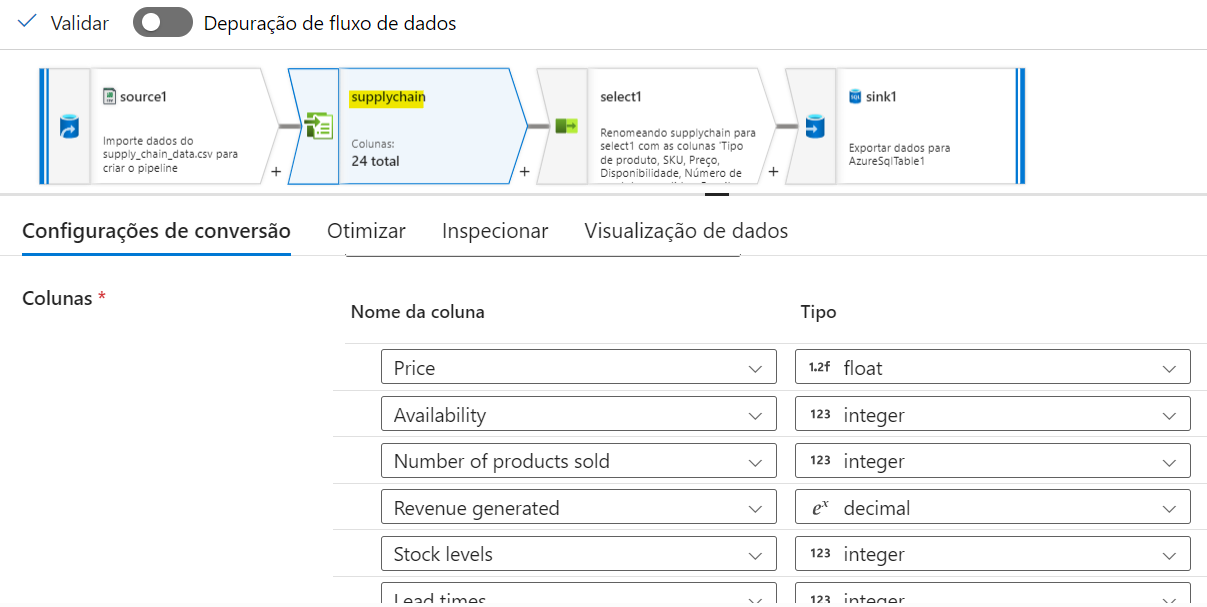



*   Modificação do dataset-(Select), neste caso, as tabelas foram renomeadas após a alteração do tipo de dados.



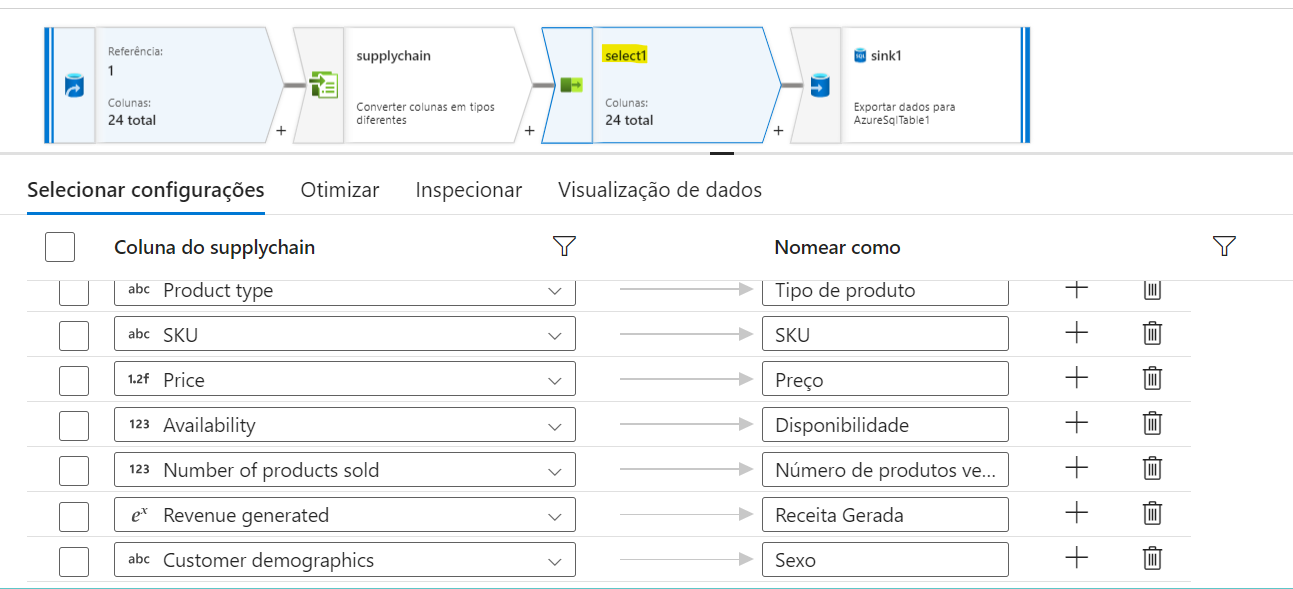



*   **Sink** - coletor de dados, neste caso, será para o Azure SQL Database.



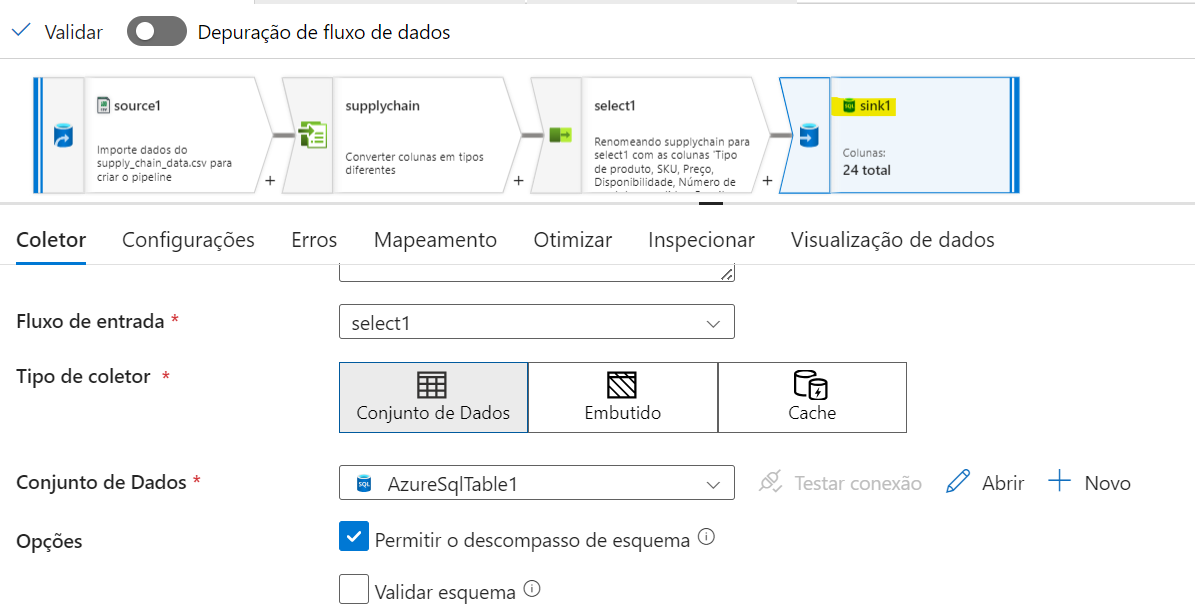



*   Inserindo o dataflow no pipeline para validar os dados. Validar e reliazar o debug, para montar o cluster.




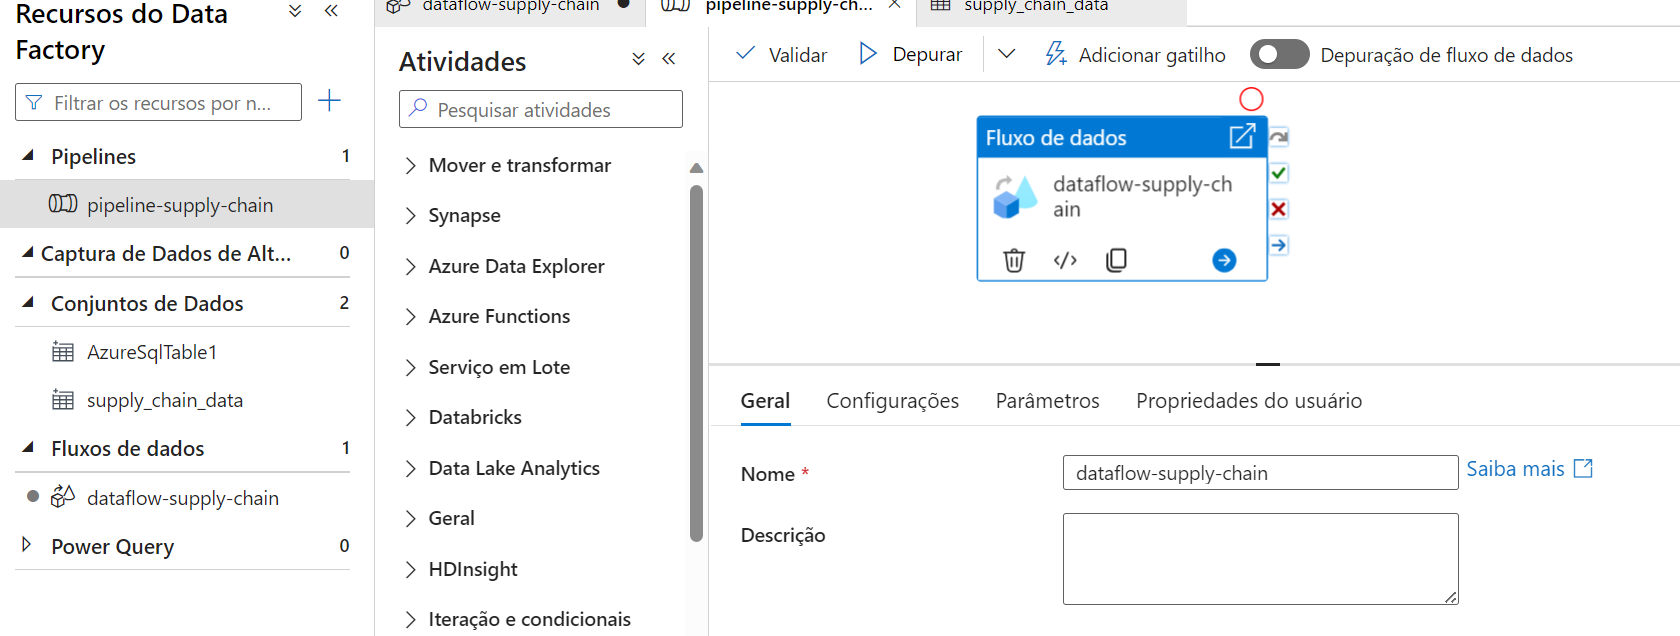

# AZURE SQL DATABASE

Após a finalização do pipeline, foi conectado ao AZURE SQL para a reliazação das consultas:

### **Exibindo o banco de dados supply-chain**

SELECT * FROM [supply_chain];


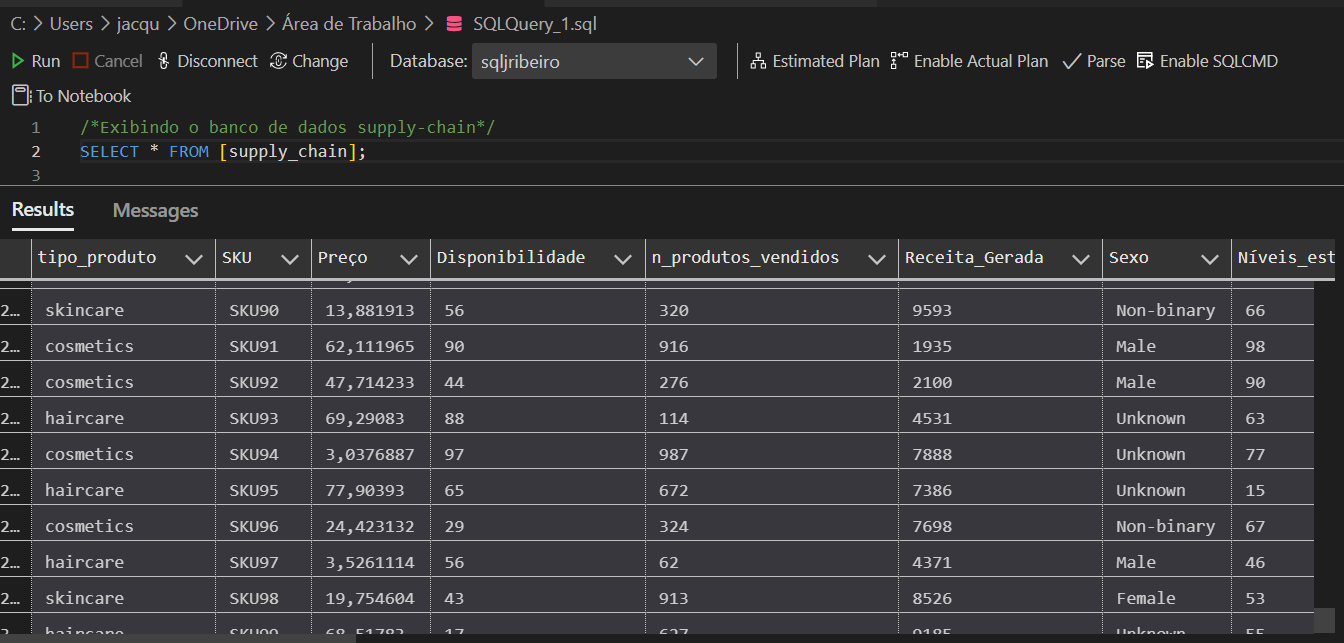

### **Quais os itens mais e menos vendidos?**

SELECT tipo_produto,

  MAX(n_produtos_vendidos) AS Mais_Vendidos,

  MIN(n_produtos_vendidos) AS Menos_Vendidos

FROM supply_chain

GROUP BY tipo_produto;


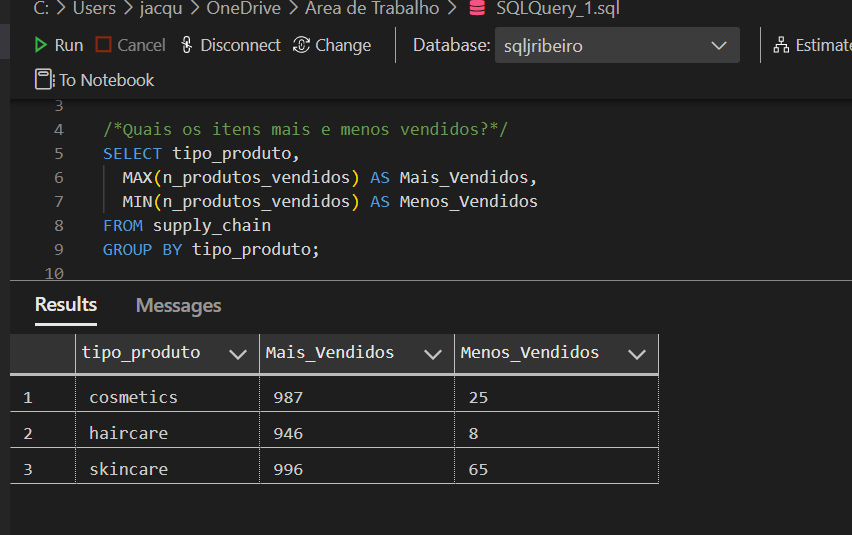

### **Qual a receita gerada pelo produto mais vendido?**





SELECT tipo_produto,  

   SUM(Receita_Gerada) AS produto_receita

FROM supply_chain

WHERE tipo_produto = 'skincare'

GROUP BY tipo_produto;


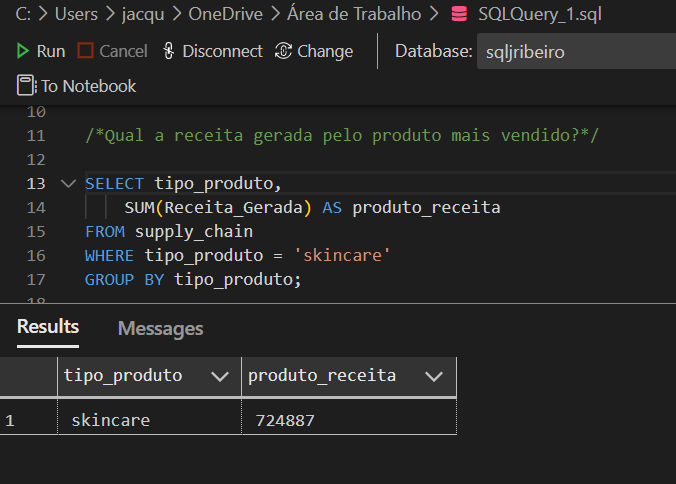

### **Qual a receita total gerada?**

SELECT SUM(Receita_Gerada) AS receita_total

FROM supply_chain;

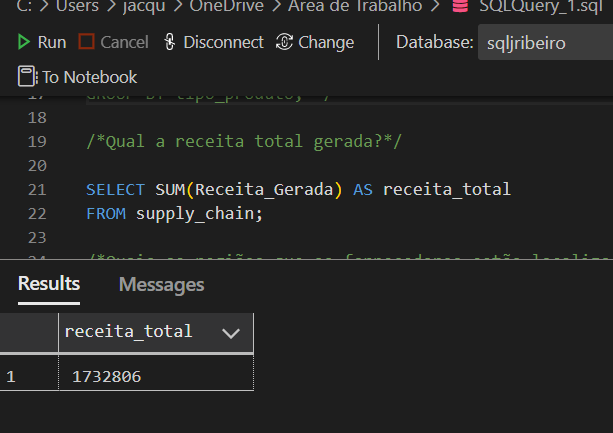

### **Quais as regiões que os fornecedores estão localizados?**

SELECT DISTINCT Localização, Fornecedor, transportadoras_marítimas

FROM supply_chain

ORDER BY Localização;


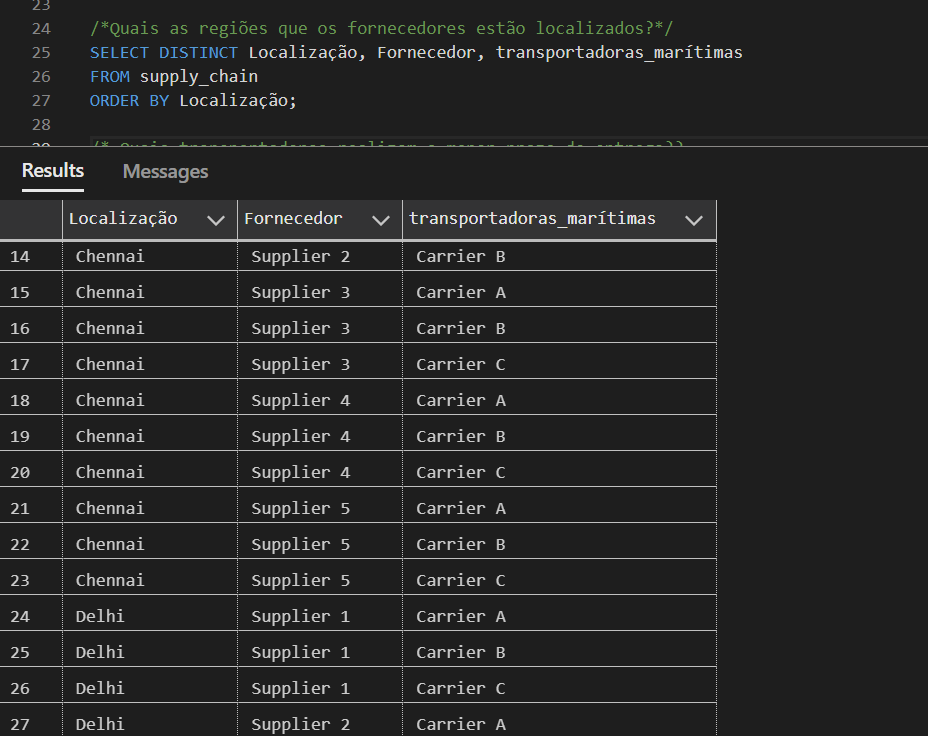

# GOVERNANÇA DE DADOS - AZURE PURVIEW

O Microsoft Purview fornece uma solução de governança de dados unificada para ajudar a gerenciar e controlar seus dados locais, multinuvem e SaaS (software como serviço). Cria facilmente um mapa holístico e atualizado de seu cenário de dados com a descoberta automatizada de dados, a classificação de dados confidenciais e a linhagem de dados de ponta a ponta.

## Catálogo de dados no Purview Studio

Purview permite classificar os dados independentemente de onde estão armazados, na nuvem ou em máquina local.
Após a criação da conta pelo portal do Azure, é possível gerenciar os acessos e alterar as configurações da rede.

No Purview Studio, é possível registrar as fontes de dados e começar a digitalizá-los para catalogar os nossos dados.

Há diversas fontes de dados para serem cadastradas. Neste caso, foi cadastrado o Banco de Dados SQL do Azure, onde nossos dados supply-chain foram armazenados.

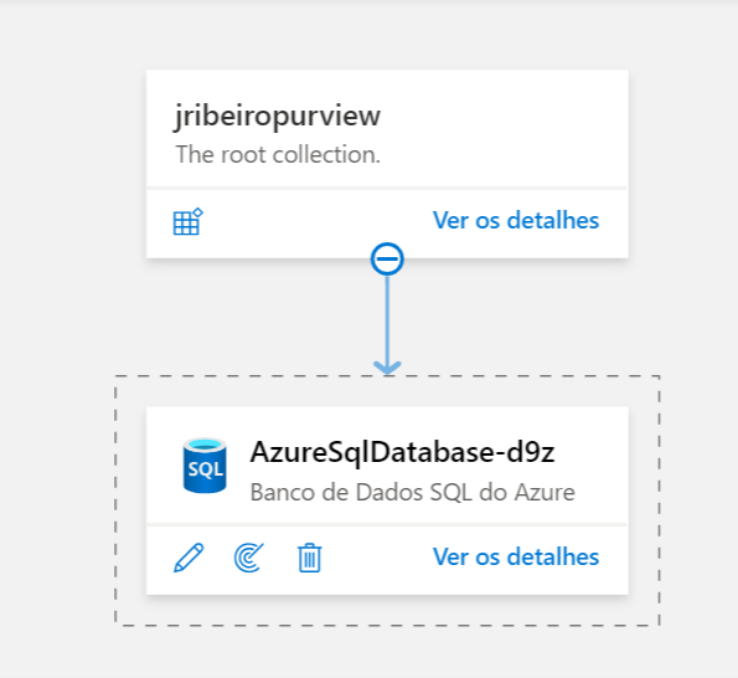

Para iniciar, será necessário criar uma varredura para conceder o acesso ao Data Purview, para iniciar a varredura da tabela supply-chain. Foi necessário conceder acesso ao banco de dados SQL no portal do Azure.

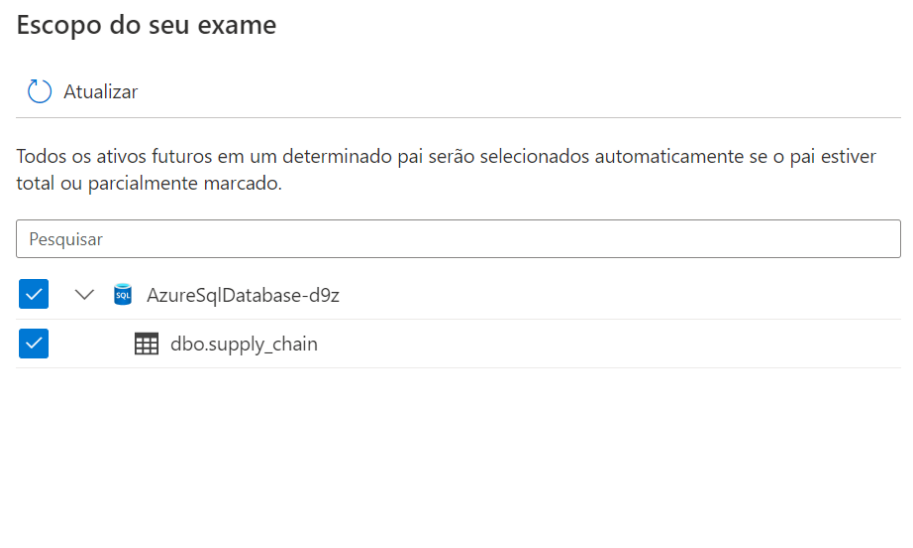

Após a concessão de acesso, a digitalização dos dados foi realizada e uma classificação foi realizada:

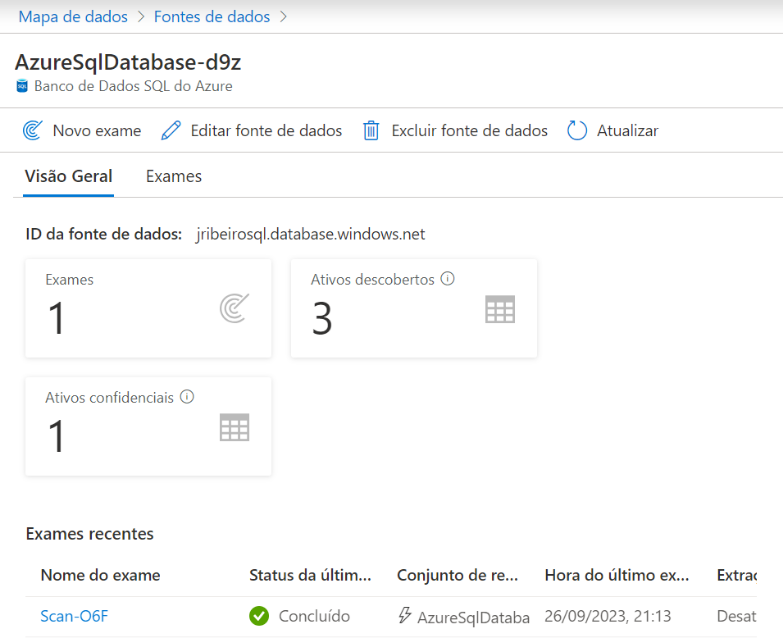

Pesquisa do Catálogo de Dados

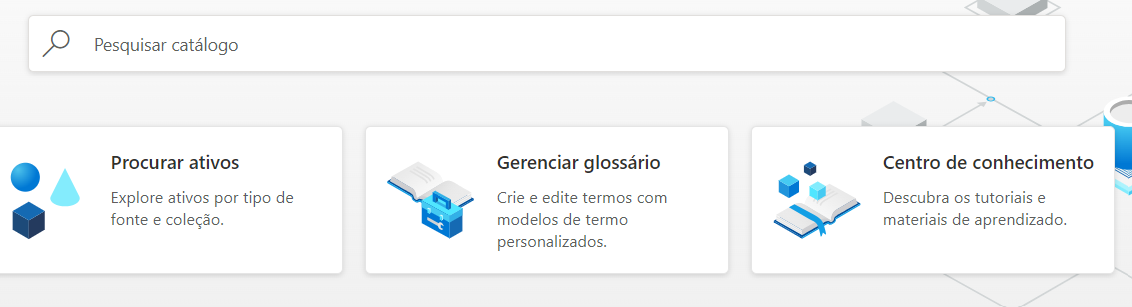

Nosso ativo supply-chain foi criado

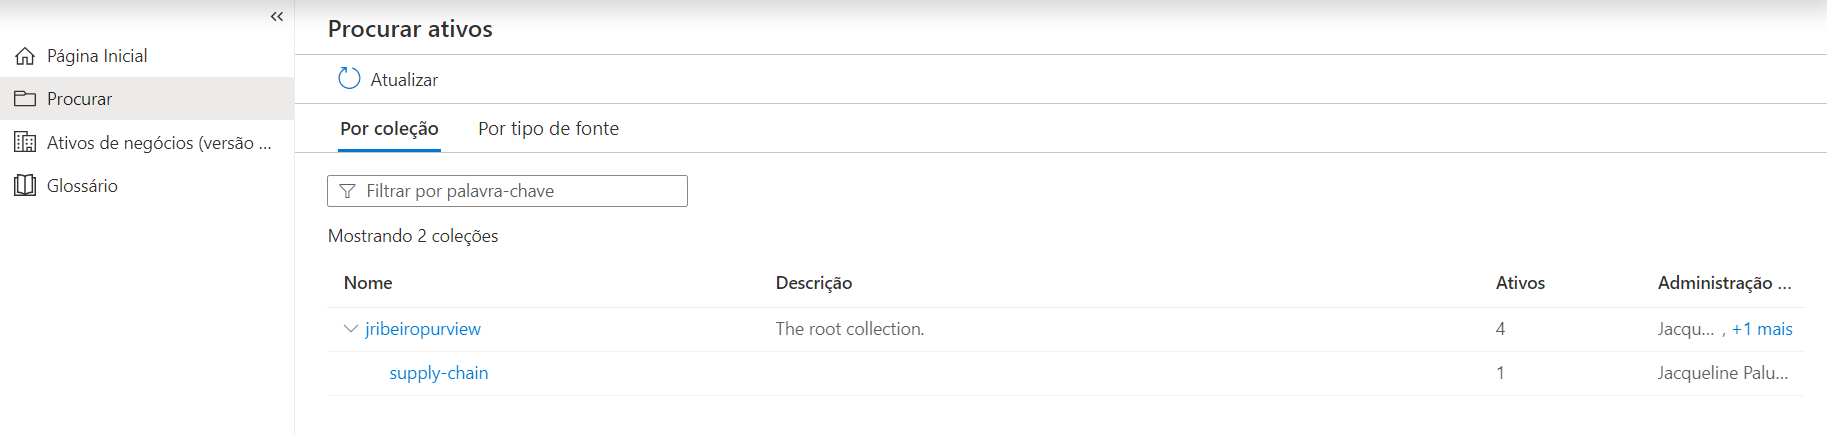

Nosso ativo está com descrição do banco de dados

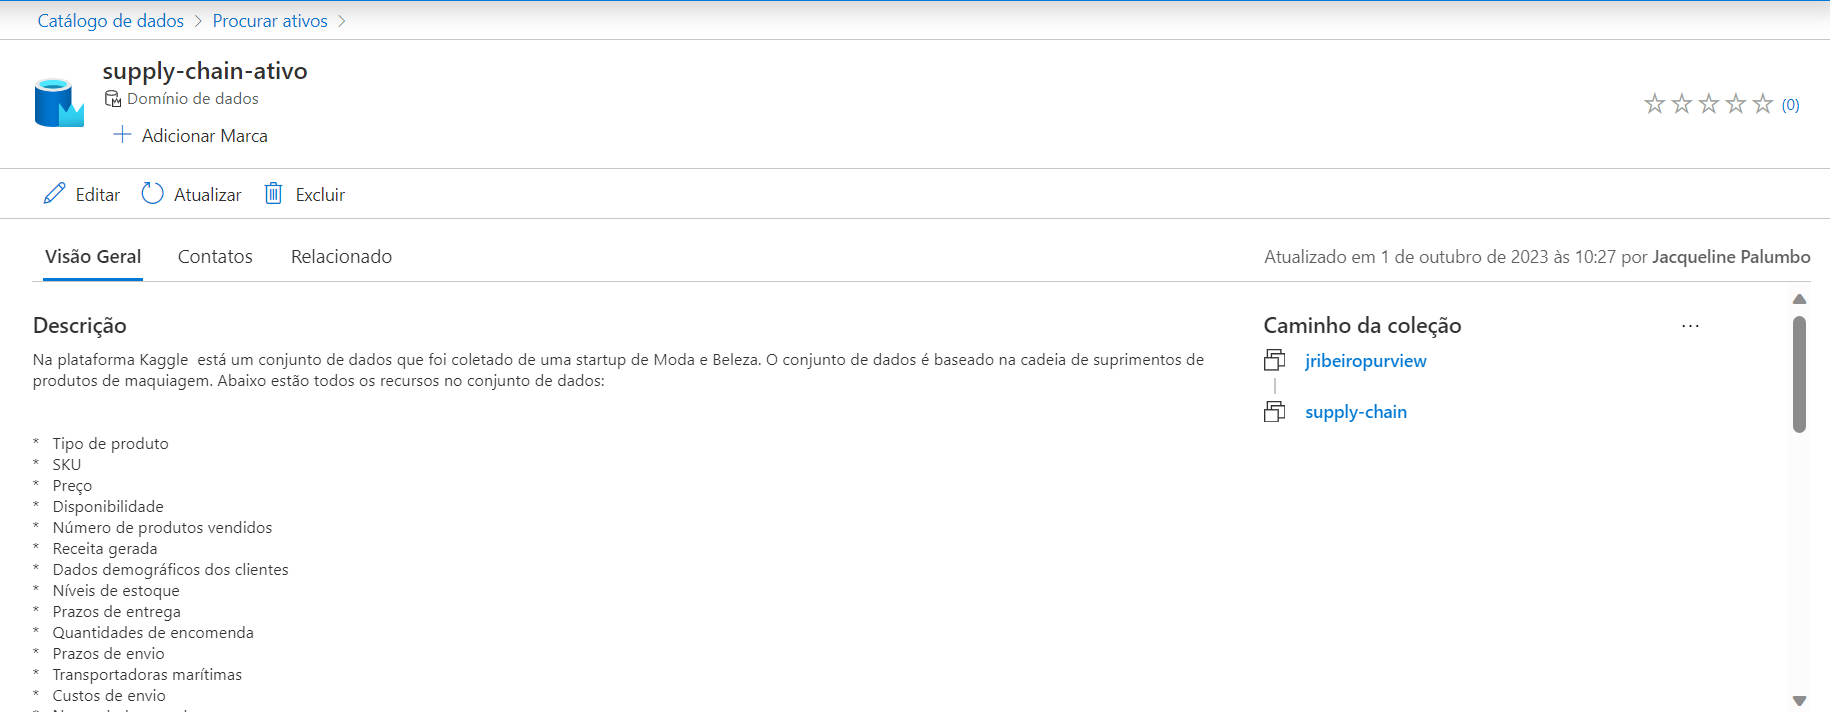

Os proprietários e especilistas que manuseiam nosso banco de dados

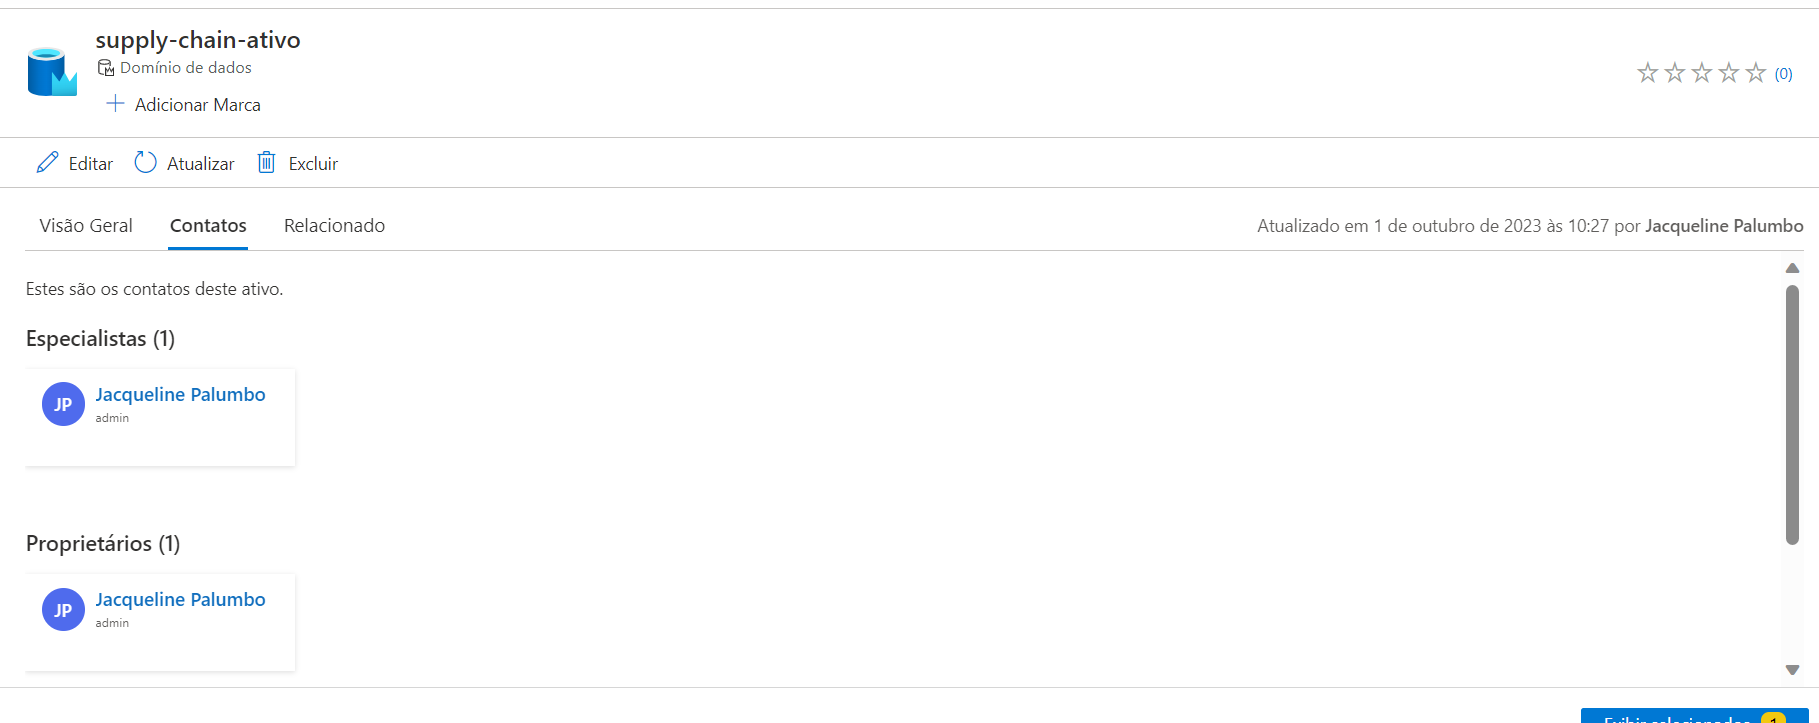

O relacionado dos nossos dados e tudo que possa ser realizado com eles, ideal para mapeamento e gerenciamento

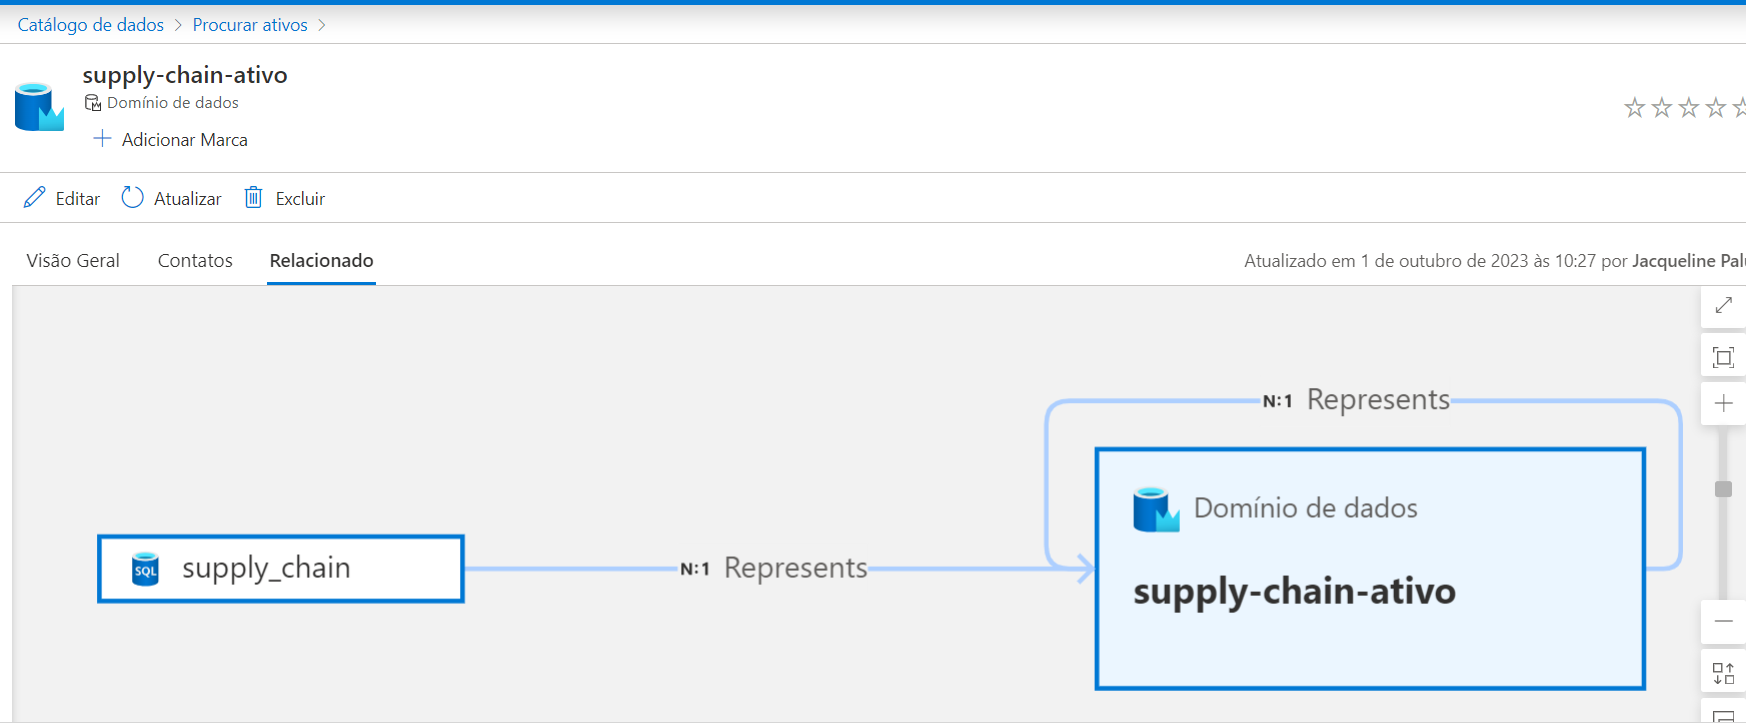

Visualização lógica nossa coleção de fonte de dados

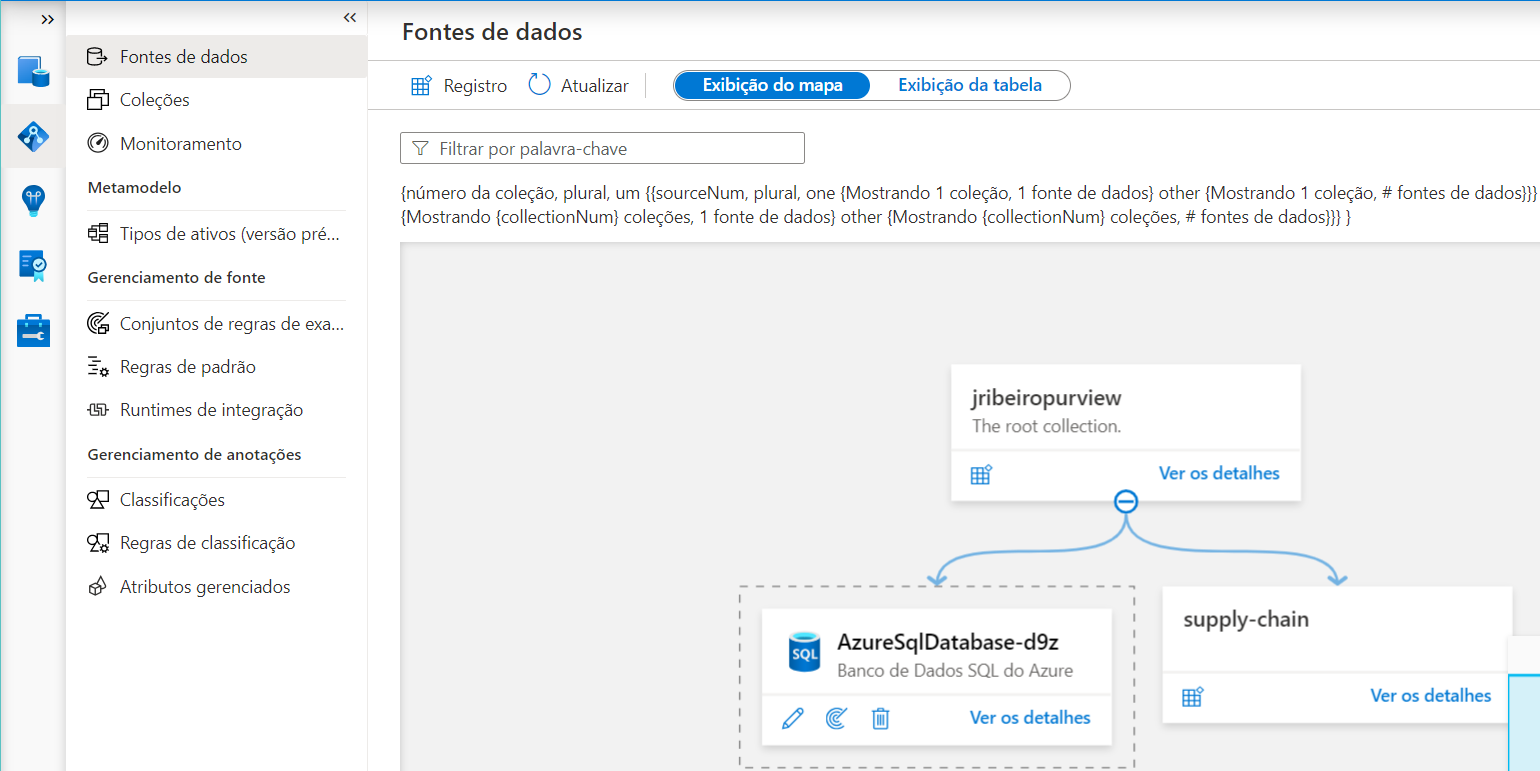

Nosso banco de dados do SQL do Azure possui a hierarquia do servidor e do bancos de dados

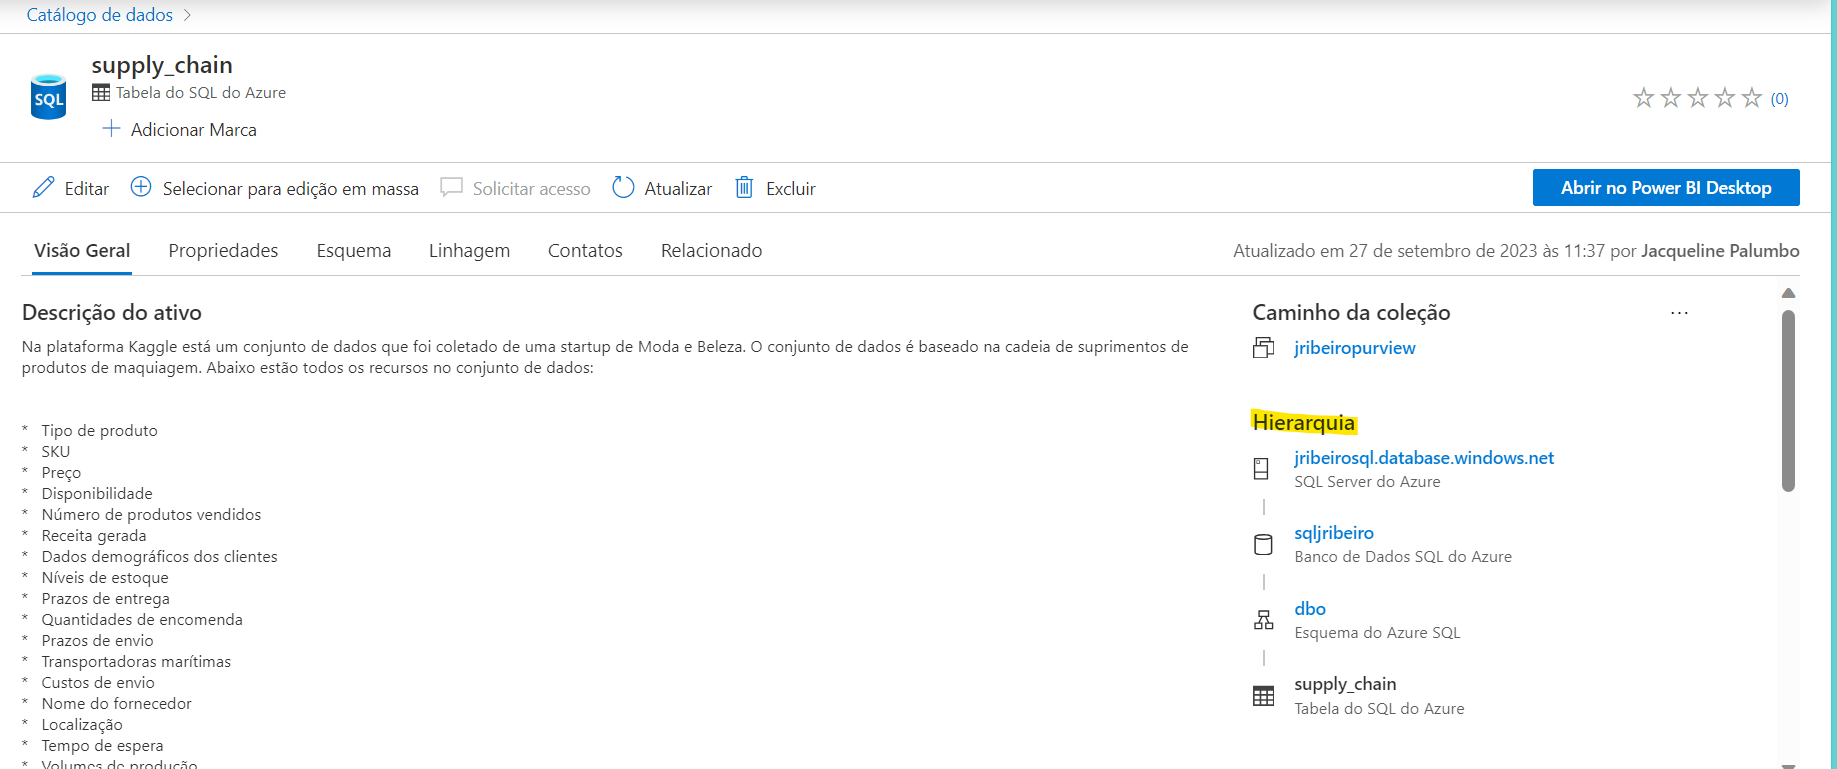

Na guia de relacionado podemos analisar que há apenas um esquema em nosso banco de dados

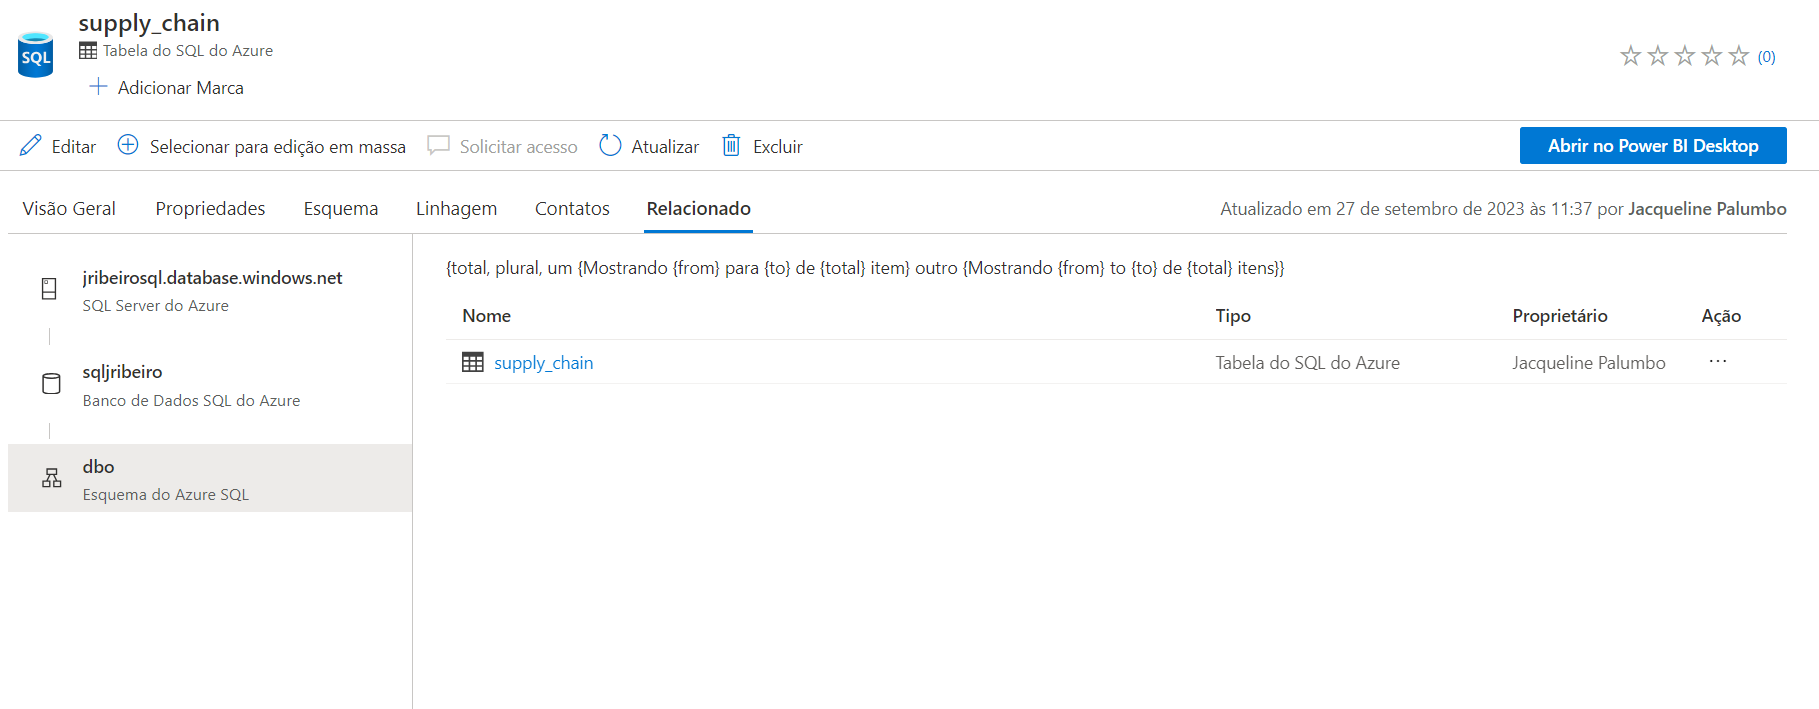

No nosso esquema há nossas entidades, assim como suas descrições e tipo de dados. Podemos adicionar os termos do glossário, no qual define-se a nomenclatura das nossas entidades.

Observação: nosso glossário está com os mesmos termos apenas para exemplificação. Mas é possível criar e adicionar os termos do glossário de acordo com as necessidades da organização.


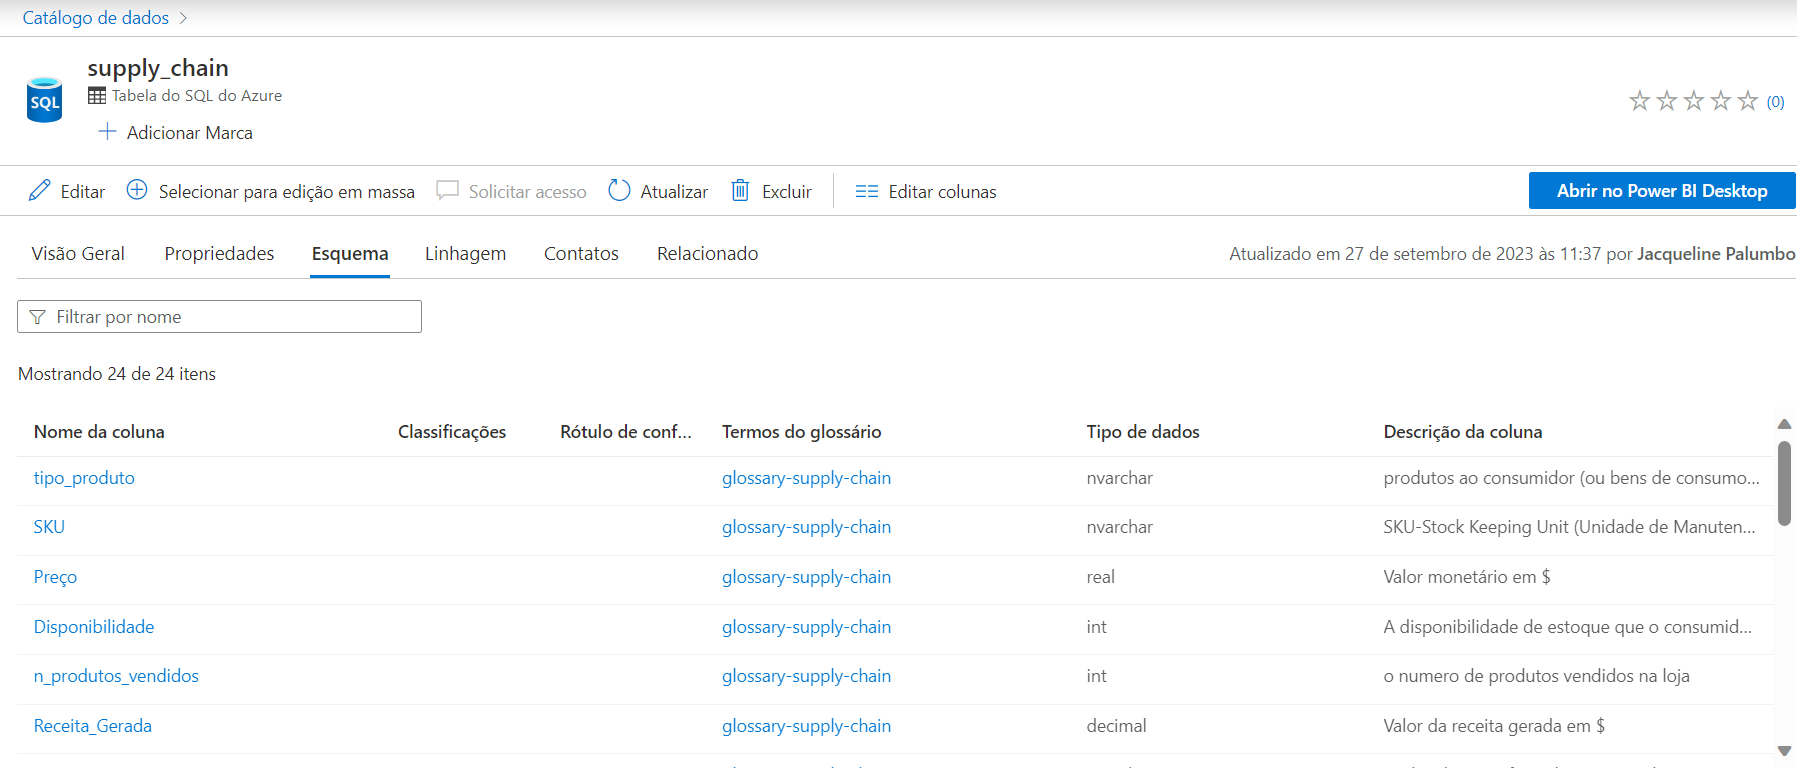

# ANÁLISE EXPLORATÓRIA DE DADOS COM PYTHON

Utilizaremos as bibliotecas:

 Pandas para realizarmos a análise exploratória do dataset, retirado do

*   Pandas para realizarmos a análise exploratória do dataset, retirado do banco de dados do Data Studio.

*   O NumPy, pacote fundamental, para a computação científica com Python.

*   Matplotlib, com as bibliotecas de plotagem gráfica.

*   O Seaborn, é uma biblioteca de visualização baseada em Matplotlib, para a criação de gráficos atrativos.

In [22]:
# Importação das Bibliotecas
import numpy as np # Importação do Numpy
import pandas as pd # Importação do Pandas
import matplotlib.pyplot as plt # Importação do Matplotlib
import seaborn as sns # Importação do Seaborn

print("Configuração Concluída") # Exibir na tela "Configuração Concluída"

Configuração Concluída


## Salvando o arquivo do Data Studio Azure no formato CSV na máquina local.

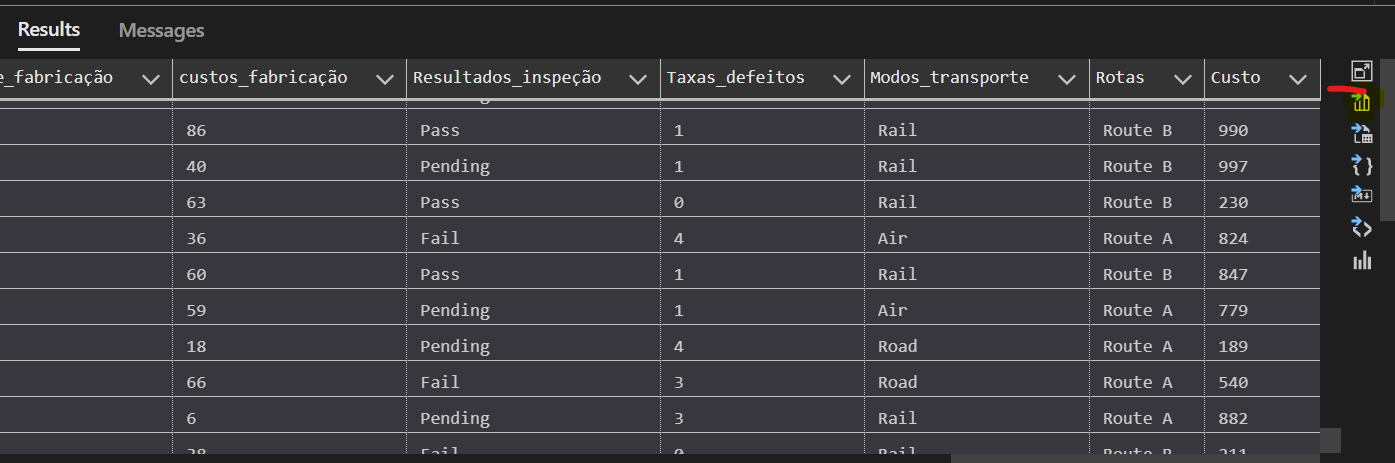![image.png](
  
)


 Colab possibilita que você insira arquivos do seu computador no notebook através do método files do módulo google.colab. Ao chamar files.upload(), uma caixa de seleção vai aparecer como na imagem abaixo:

In [6]:
# Fazendo upload da máquina local via colab
from google.colab import files
uploaded =  files.upload()

Saving supply-chain-data-studio.csv to supply-chain-data-studio.csv


Depois de escolher o arquivo, o objeto uploaded acima, que é um dicionário com os dados em formato de bytes, pode ser manipulado para virar um objeto tratado pelo pandas. Para isso, usamos a biblioteca io, como mostrado no exemplo abaixo.

In [7]:
import io # importando a biblioteca io
dataset = pd.read_csv(io.BytesIO(uploaded['supply-chain-data-studio.csv']))

In [8]:
# Verificando que o dataset é um dataframe
print(type(dataset))

# Verificando os tipos de cada coluna do dataframe
dataset.dtypes

<class 'pandas.core.frame.DataFrame'>


tipo_produto                 object
SKU                          object
Preço                        object
Disponibilidade               int64
n_produtos_vendidos           int64
Receita_Gerada                int64
Sexo                         object
Níveis_estoque                int64
Prazos_entrega                int64
Quantidades_encomenda         int64
Prazos_envio                  int64
transportadoras_marítimas    object
Custos_envio                  int64
Fornecedor                   object
Localização                  object
Tempo_espera                  int64
Volumes_produção              int64
Lead_time_fabricação          int64
custos_fabricação             int64
Resultados_inspeção          object
Taxas_defeitos                int64
Modos_transporte             object
Rotas                        object
Custo                         int64
dtype: object

## Explorando o dataset

Inicialmente, iremos utilizar alguns comandos da biblioteca Pandas, para exibir algumas estatísticas descritivas e fazer uma rápida análise exploratória do dataset. Os comentários nos blocos de código auxiliam no seu entendimento.

In [9]:
# Exibindo as 5 primeiras linhas
dataset.head()

,tipo_produto,SKU,Preço,Disponibilidade,n_produtos_vendidos,Receita_Gerada,Sexo,Níveis_estoque,Prazos_entrega,Quantidades_encomenda,...,Localização,Tempo_espera,Volumes_produção,Lead_time_fabricação,custos_fabricação,Resultados_inspeção,Taxas_defeitos,Modos_transporte,Rotas,Custo
0,haircare,SKU0,"69,80801",55,802,8662,Non-binary,58,7,96,...,Mumbai,29,215,29,46,Pending,0,Road,Route B,188
1,skincare,SKU1,"14,843523",95,736,7461,Female,53,30,37,...,Mumbai,23,517,30,34,Pending,5,Road,Route B,503
2,haircare,SKU2,"11,319683",34,8,9578,Unknown,1,10,88,...,Mumbai,12,971,27,31,Pending,5,Air,Route C,142
3,skincare,SKU3,"61,16334",68,83,7767,Non-binary,23,13,59,...,Kolkata,24,937,18,36,Fail,5,Rail,Route A,255
4,skincare,SKU4,"4,805496",26,871,2687,Non-binary,5,3,56,...,Delhi,5,414,3,92,Fail,3,Air,Route A,923


In [10]:
# Exibindo as últimas 5 linhas
dataset.tail()

,tipo_produto,SKU,Preço,Disponibilidade,n_produtos_vendidos,Receita_Gerada,Sexo,Níveis_estoque,Prazos_entrega,Quantidades_encomenda,...,Localização,Tempo_espera,Volumes_produção,Lead_time_fabricação,custos_fabricação,Resultados_inspeção,Taxas_defeitos,Modos_transporte,Rotas,Custo
295,haircare,SKU95,"77,90393",65,672,7386,Unknown,15,14,26,...,Mumbai,18,450,26,59,Pending,1,Air,Route A,779
296,cosmetics,SKU96,"24,423132",29,324,7698,Non-binary,67,2,32,...,Mumbai,28,648,28,18,Pending,4,Road,Route A,189
297,haircare,SKU97,"3,5261114",56,62,4371,Male,46,19,4,...,Mumbai,10,535,13,66,Fail,3,Road,Route A,540
298,skincare,SKU98,"19,754604",43,913,8526,Female,53,1,27,...,Chennai,28,581,9,6,Pending,3,Rail,Route A,882
299,haircare,SKU99,"68,51783",17,627,9185,Unknown,55,8,59,...,Chennai,29,921,2,38,Fail,0,Rail,Route B,211


In [11]:
# Exibindo as dimensões do dataset
dataset.shape

(300, 24)

In [12]:
# Exibindo a quantidade de linhas por coluna
dataset.count()

tipo_produto                 300
SKU                          300
Preço                        300
Disponibilidade              300
n_produtos_vendidos          300
Receita_Gerada               300
Sexo                         300
Níveis_estoque               300
Prazos_entrega               300
Quantidades_encomenda        300
Prazos_envio                 300
transportadoras_marítimas    300
Custos_envio                 300
Fornecedor                   300
Localização                  300
Tempo_espera                 300
Volumes_produção             300
Lead_time_fabricação         300
custos_fabricação            300
Resultados_inspeção          300
Taxas_defeitos               300
Modos_transporte             300
Rotas                        300
Custo                        300
dtype: int64

In [13]:
# Exibindo informações sobre o Dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tipo_produto               300 non-null    object
 1   SKU                        300 non-null    object
 2   Preço                      300 non-null    object
 3   Disponibilidade            300 non-null    int64 
 4   n_produtos_vendidos        300 non-null    int64 
 5   Receita_Gerada             300 non-null    int64 
 6   Sexo                       300 non-null    object
 7   Níveis_estoque             300 non-null    int64 
 8   Prazos_entrega             300 non-null    int64 
 9   Quantidades_encomenda      300 non-null    int64 
 10  Prazos_envio               300 non-null    int64 
 11  transportadoras_marítimas  300 non-null    object
 12  Custos_envio               300 non-null    int64 
 13  Fornecedor                 300 non-null    object
 14  Localizaçã

In [14]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,Disponibilidade,n_produtos_vendidos,Receita_Gerada,Níveis_estoque,Prazos_entrega,Quantidades_encomenda,Prazos_envio,Custos_envio,Tempo_espera,Volumes_produção,Lead_time_fabricação,custos_fabricação,Taxas_defeitos,Custo
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,48.400000,460.990000,5776.020000,47.770000,15.960000,49.220000,5.750000,5.550000,17.080000,567.840000,14.770000,47.300000,2.290000,529.240000
std,30.640324,302.762382,2723.724438,31.264281,8.756368,26.694699,2.715156,2.704048,8.816616,262.165629,8.882573,28.860117,1.560132,257.419707
min,1.000000,8.000000,1062.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,104.000000,1.000000,1.000000,0.000000,104.000000
25%,22.750000,184.250000,2812.500000,16.750000,8.000000,26.000000,3.750000,3.750000,10.000000,352.000000,7.000000,23.000000,1.000000,319.000000
50%,43.500000,392.500000,6006.500000,47.500000,17.000000,52.000000,6.000000,5.000000,18.000000,568.500000,14.000000,46.000000,2.000000,520.000000
75%,75.000000,704.250000,8253.750000,73.000000,24.000000,71.250000,8.000000,8.000000,25.000000,797.000000,23.000000,68.500000,4.000000,762.750000
max,100.000000,996.000000,9866.000000,100.000000,30.000000,96.000000,10.000000,10.000000,30.000000,985.000000,30.000000,99.000000,5.000000,997.000000


In [15]:
# Verificando nulls no dataset
dataset.isnull().sum()

tipo_produto                 0
SKU                          0
Preço                        0
Disponibilidade              0
n_produtos_vendidos          0
Receita_Gerada               0
Sexo                         0
Níveis_estoque               0
Prazos_entrega               0
Quantidades_encomenda        0
Prazos_envio                 0
transportadoras_marítimas    0
Custos_envio                 0
Fornecedor                   0
Localização                  0
Tempo_espera                 0
Volumes_produção             0
Lead_time_fabricação         0
custos_fabricação            0
Resultados_inspeção          0
Taxas_defeitos               0
Modos_transporte             0
Rotas                        0
Custo                        0
dtype: int64

In [16]:
# Exibindo os valores da Coluna [Localização]
dataset['Localização'].value_counts()

Kolkata      75
Mumbai       66
Chennai      60
Bangalore    54
Delhi        45
Name: Localização, dtype: int64

## Construção de Gráficos

### Fornecedores

Kolkata      75
Mumbai       66
Chennai      60
Bangalore    54
Delhi        45
Name: Localização, dtype: int64



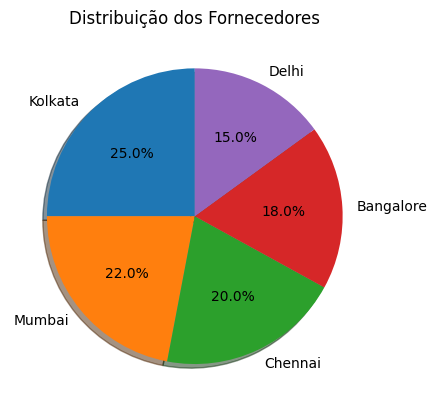

In [26]:
# Gráfico Pizza

print(dataset['Localização'].value_counts())
print()

label =  "Kolkata", "Mumbai", "Chennai", "Bangalore", "Delhi" # nomes
sizes = dataset['Localização'].value_counts(normalize = True)*100 # inserção dos valores no gráfico,valores com porcentagem

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = label, autopct='%1.1f%%', shadow=True, startangle=90) # ajustes do gráfico
plt.title("Distribuição dos Fornecedores") # título
plt.show(); # Exibindo gráfico

### Fabricação

Text(0.5, 1.0, 'Custos de envio por modo de transporte')

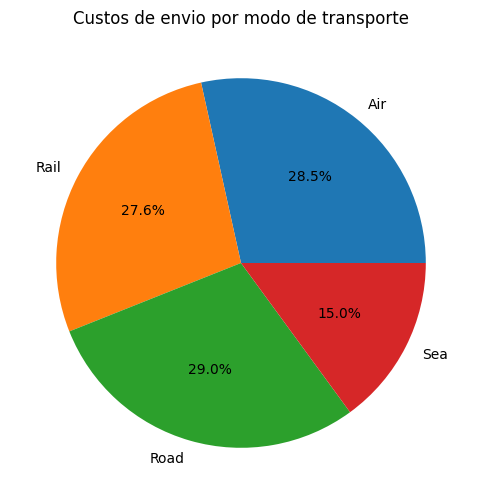

In [27]:
# Agrupando os dados por modos de transporte e calculando os custos totais de envio para cada modo
custo_transportes = dataset.groupby('Modos_transporte')['Custos_envio'].sum()

# Gráfico de pizza do Custos de envio por modo de transporte
plt.figure(figsize=(8,6)) # tamanho do gráfico
plt.pie(custo_transportes, labels=custo_transportes.index, autopct='%1.1f%%') # plotagem
plt.title('Custos de envio por modo de transporte') # inserindo título

<Figure size 2000x1000 with 0 Axes>

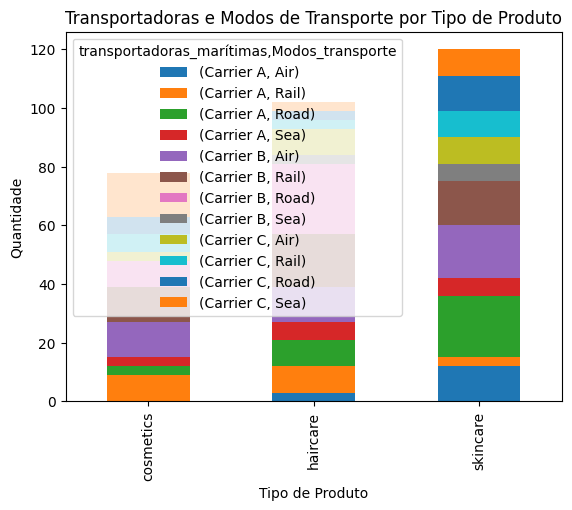

In [28]:
# Gráfico de barras empilhado de transportadoras e modos de transporte
plt.figure(figsize=(20,10 )) # tamanho do gráfico
pd.crosstab(dataset['tipo_produto'], [dataset['transportadoras_marítimas'], dataset['Modos_transporte']]).plot(kind='bar', stacked=True) #plotagem
plt.xlabel('Tipo de Produto') # título eixo x
plt.ylabel('Quantidade') # título eixo y
plt.title('Transportadoras e Modos de Transporte por Tipo de Produto') # título do gráfico
plt.show()

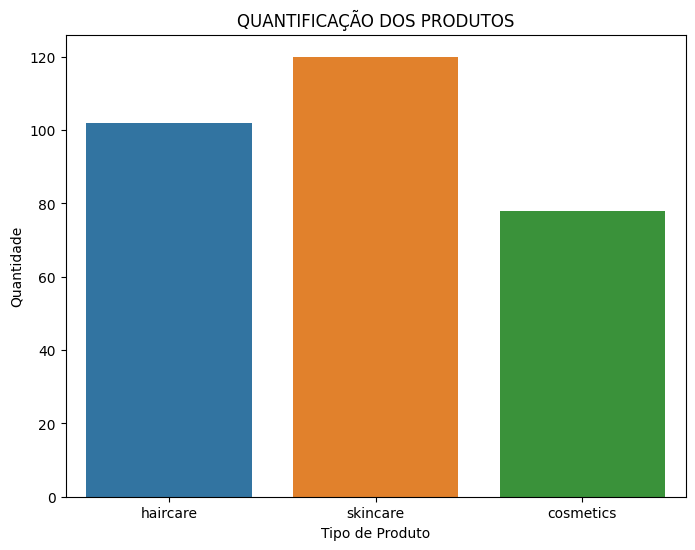

In [29]:
# Grafico de barras dos tipos de produtos
plt.figure(figsize=(8,6)) # tamanho do gráfico
sns.countplot(data=dataset, x='tipo_produto') # plotagem
plt.xlabel('Tipo de Produto') # título eixo x
plt.ylabel('Quantidade') # título eixo y
plt.title('QUANTIFICAÇÃO DOS PRODUTOS') # título do gráfico
plt.show()

### Vendas

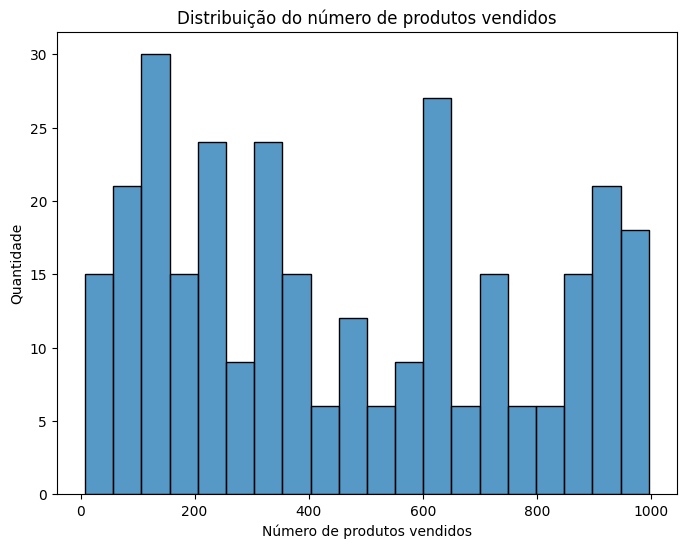

In [30]:
# Gráfico Histograma de Número de produtos vendidos
plt.figure(figsize=(8,6)) # tamanho do gráfico
sns.histplot(data=dataset, x='n_produtos_vendidos', bins=20) #plotagem
plt.xlabel('Número de produtos vendidos') # título eixo x
plt.ylabel('Quantidade') # título eixo y
plt.title('Distribuição do número de produtos vendidos') # título do gráfico
plt.show()

Text(0.5, 1.0, 'Custo de Frabricação vs Lead Time')

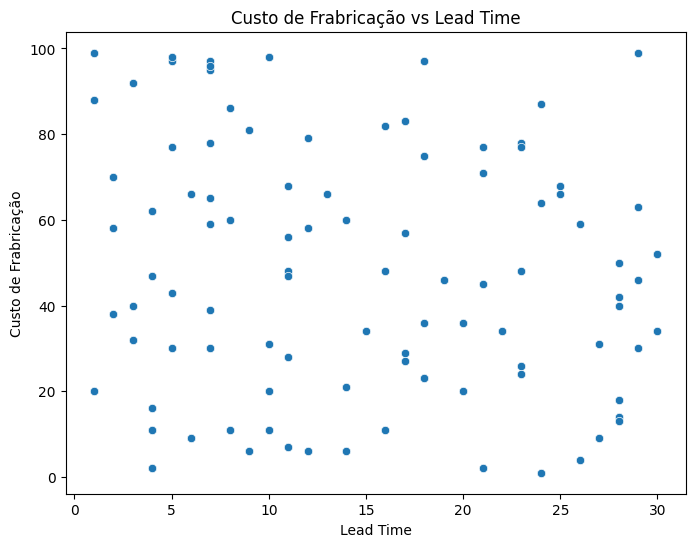

In [31]:
# Gráfico scatter do custo de fabricação e lead times
plt.figure(figsize=(8,6)) # tamanho do gráfico
sns.scatterplot(data=dataset, x='Lead_time_fabricação', y='custos_fabricação') # plotagem
plt.xlabel('Lead Time') # título eixo x
plt.ylabel('Custo de Frabricação') # título eixo y
plt.title('Custo de Frabricação vs Lead Time') # título do gráfico

### Receita

Text(0.5, 1.0, 'Os 15 Produtos Mais Vendidos')

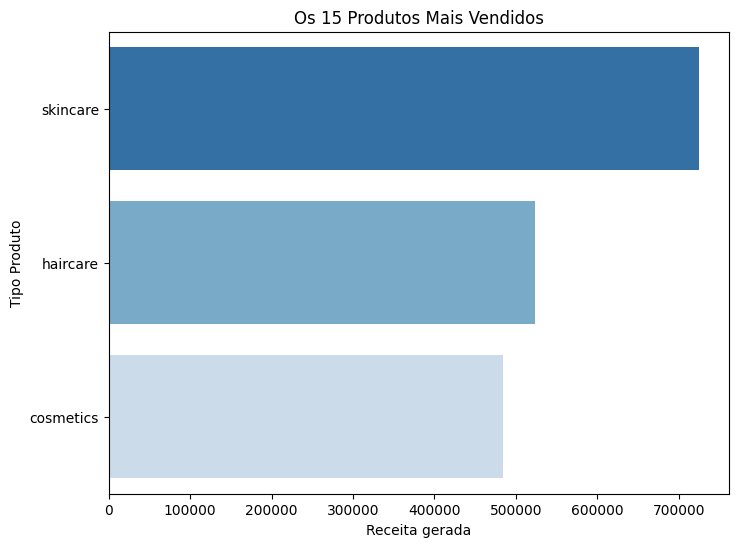

In [32]:
#  Agrupando os dados por tipo de produto e calculando a receita total gerada por cada produto
Receita_Produto = dataset.groupby('tipo_produto')['Receita_Gerada'].sum()

# Classificando os produtos por receita em ordem decrescente
Receita_Produto = Receita_Produto.sort_values(ascending=False)

# Gráfico de barras dos 15 produtos pela receita
plt.figure(figsize=(8,6)) # tamanho do gráfico
sns.barplot(x=Receita_Produto[:10], y=Receita_Produto[:15].index, palette='Blues_r') # plotagem
plt.xlabel('Receita gerada') # título eixo x
plt.ylabel('Tipo Produto') # título eixo y
plt.title('Os 15 Produtos Mais Vendidos') # título dp gráfico

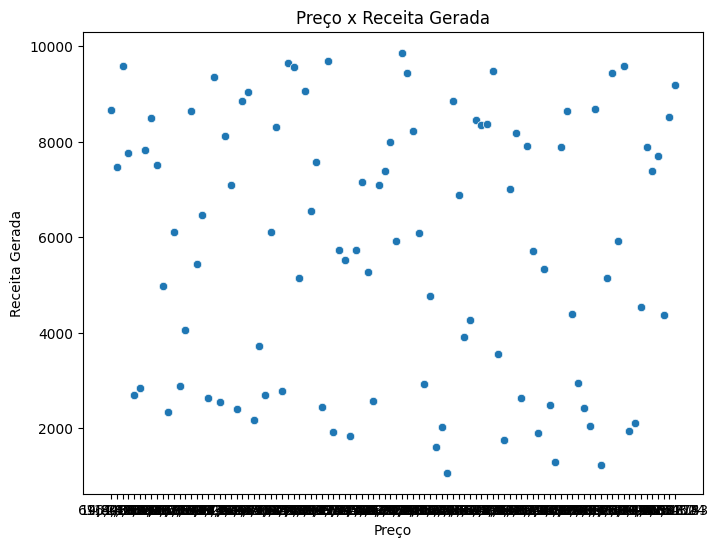

In [33]:
# Gráfico Scatter do preço pela receita
plt.figure(figsize=(8,6)) # tamanho do gráfico
sns.scatterplot(data=dataset, x='Preço', y='Receita_Gerada') # plotagem
plt.xlabel('Preço') # título eixo x
plt.ylabel('Receita Gerada') # título eixo y
plt.title('Preço x Receita Gerada') # título do gráfico
plt.show()

### Clientes

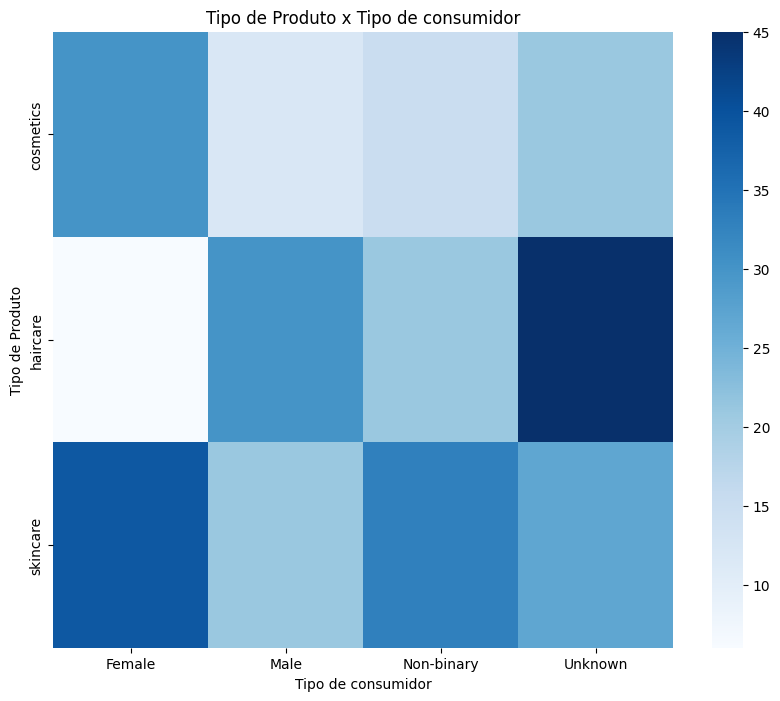

In [34]:
# Mapa de calor dos dados demográficos dos clientes
plt.figure(figsize=(10,8)) # tamanho do gráfico
sns.heatmap(pd.crosstab(dataset['tipo_produto'], dataset['Sexo']), cmap='Blues') # plotagem
plt.xlabel('Tipo de consumidor') # título eixo x
plt.ylabel('Tipo de Produto') # título eixo y
plt.title('Tipo de Produto x Tipo de consumidor') # título do gráfico
plt.show()

# CONCLUSÃO INSIGHTS

Os insights gerados sobre as operações da cadeia de suprimentos é extremamente importante.
É possível deduzir a partir das visualizações gráficas os produtos mais vendidos, geração de receita, modais de transporte, custos de envio, lead times e custos de fabricação, entre outras métricas.

A partir de uma análise, junto ao especialista de negócio, pode ser possível otimizar a gestão de estoques, evitar pertas de produtos, identificar clientes alvo, estudar melhores rotas para custo/benefício, estreitar relações comerciais com os fornecedores, entre outros.

Manter a integridade do banco de dados evita perdas ao negócio, pois aumenta performace dos dados para a geração de insights valiosos.



# CONCLUSÃO BANCO DE DADOS SUPPLY-CHAIN

A partir da Entidade Supply-Chain podemos começar a construir novos relacionamentos para especilizar ainda mais nossa companhia, representando as associações entre as entidades.

O mapeamento de um esquema conceitual, definido pelo MER, em um esquema lógico do modelo relacional envolve transformar cada elemento de um esquema de entidades e relacionamentos (entidades, relacionamentos e atributos) em elementos equivalentes da modelagem relacional (tabelas, atributos e restrições estruturais).

Com a criação de uma chave estrangeira em uma das tabelas representam as entidades envolvidas no relacionamento. No caso apresentado abaixo, podemos especializar ainda mais nosso SKU e Fornecedores, criando a entidade produto e a entidade fornecedor, por exemplo.

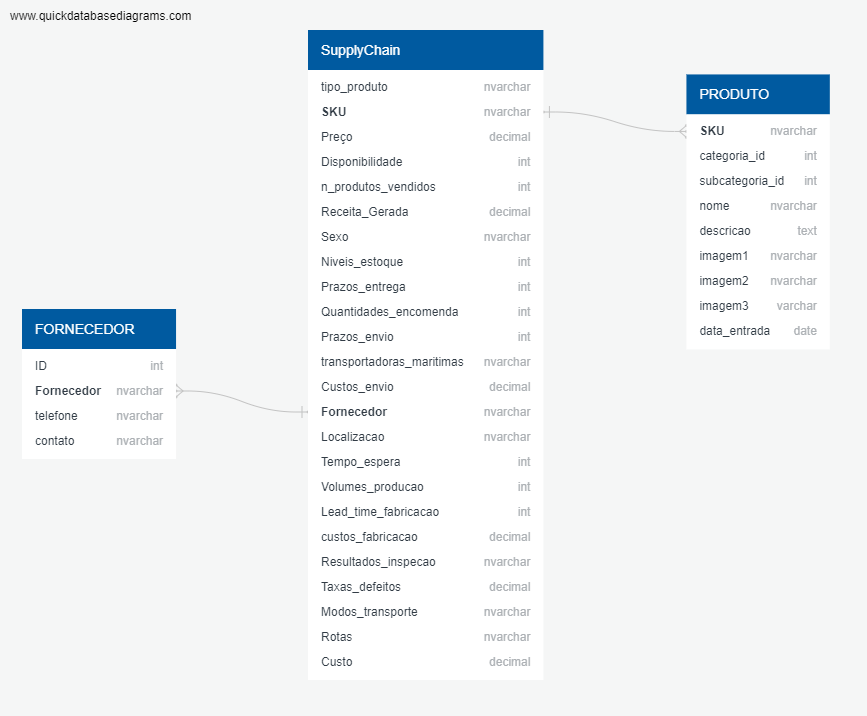